# Replay Viewer
---
If we only had a real replay viewer...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from matplotlib import pyplot as plt
from kaggle_environments.envs.halite.helpers import *
from kaggle_environments import evaluate, make
from kaggle_environments.envs.halite.helpers import *
TO_INDEX = {Point.from_index(index, 21): index for index in range(21 ** 2)}

In [2]:
REPLAY = 'replays/14/2979339.json'
STEPS = [0, 100, 250]

In [3]:
with open(REPLAY) as file:
    data = json.load(file)

env = make('halite', configuration=data['configuration'], steps=data['steps'])
# env.render(mode="ipython", width=800, height=600)
configuration = env.configuration

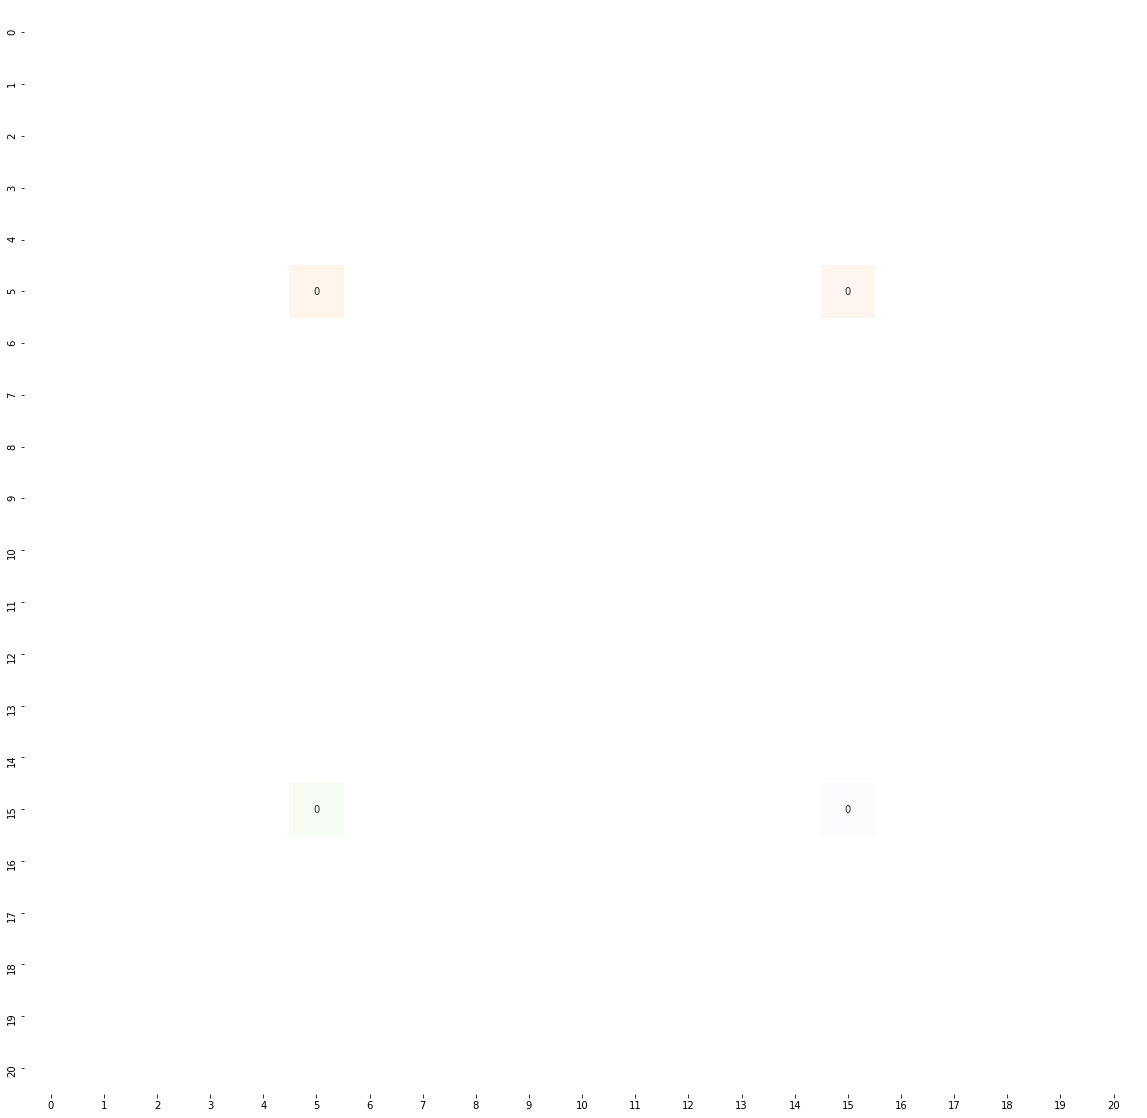

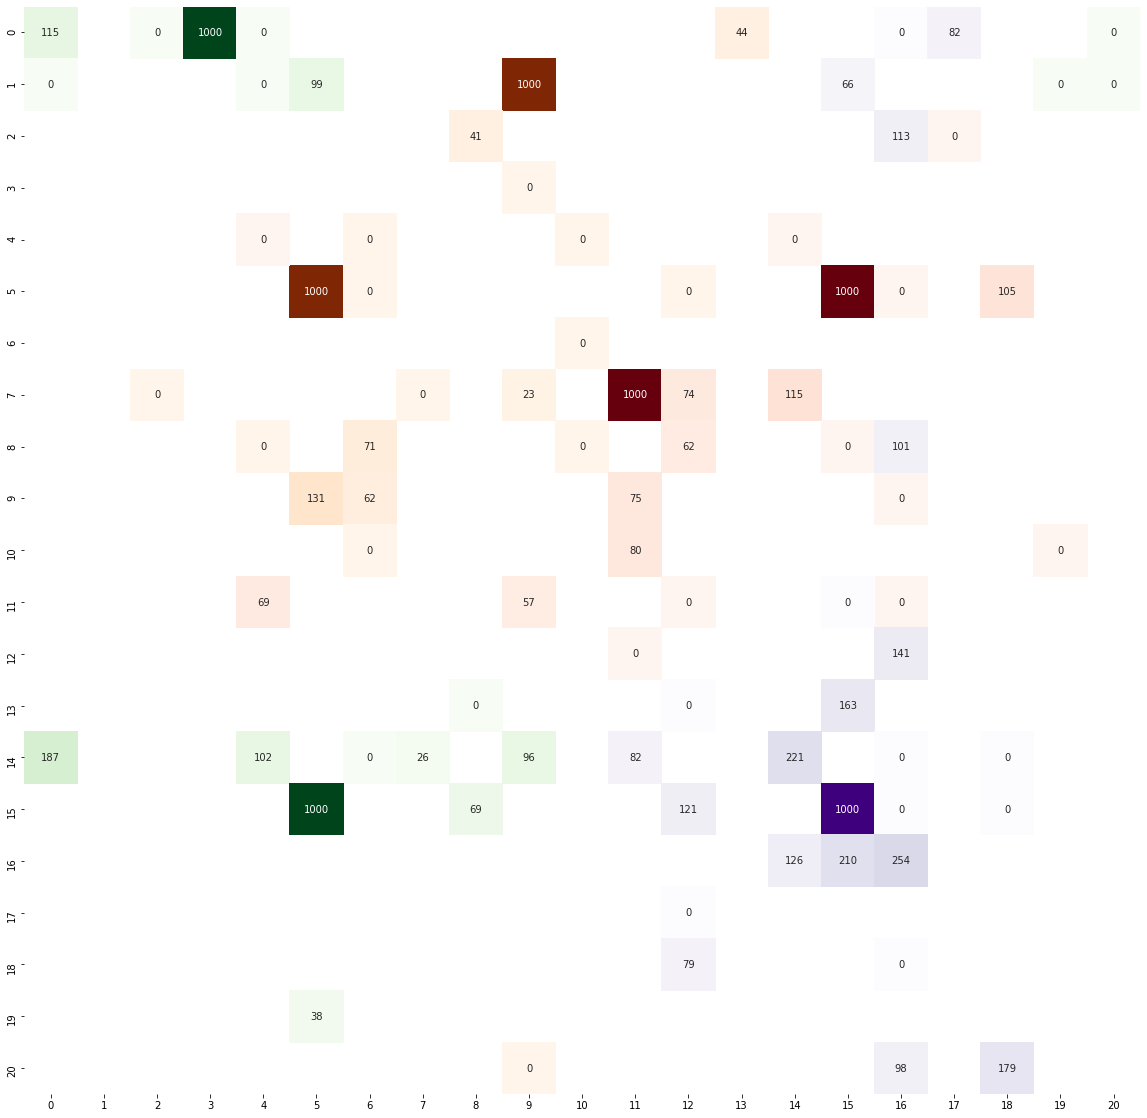

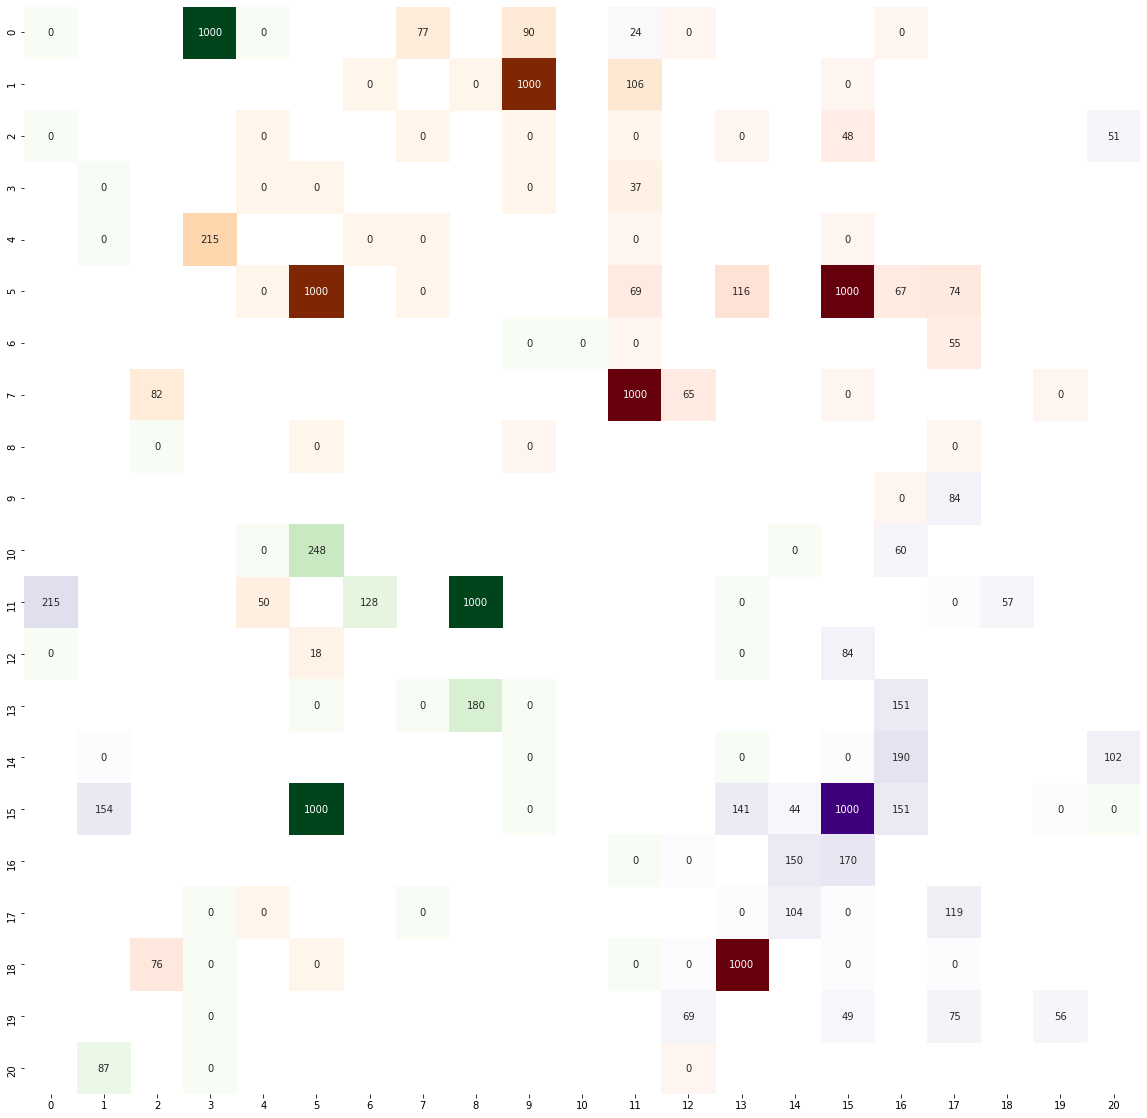

In [4]:
for step, data in enumerate(env.steps):
    if step not in STEPS:
        continue
    observation = data[0]['observation']
    board = Board(observation, configuration)
    halite_board = observation['halite']
    # Halite Map
    # plt.figure(figsize=(20, 20))
    # sns.heatmap(np.array(halite_board).astype(np.int).reshape((21, 21)), annot=True, fmt='g', cmap='Blues', cbar=False)
    
    # Ships
    plt.figure(figsize=(20, 20))
    colors = ["Oranges", "Reds", "Greens", "Purples"]
    for p_id in range(4):
        player_map = np.full(shape=(21 ** 2), fill_value=int(-1), dtype=np.float)
        for ship in board.players[p_id].ships:
            player_map[TO_INDEX[ship.position]] = ship.halite
        for shipyard in board.players[p_id].shipyards:
            player_map[TO_INDEX[shipyard.position]] = 1000
        player_map = player_map.reshape((21, 21))
        sns.heatmap(player_map, mask=(player_map < 0), annot=True, fmt='g', cmap=colors[p_id], cbar=False)